<a href="https://colab.research.google.com/github/ManjunathD620/Machine-Learning/blob/main/DNN_for_Classification_and_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import mnist
from matplotlib import pyplot
import numpy as np
(trainX, trainY), (testX, testY) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [2]:
trainX = trainX.astype("float32")
testX = testX.astype("float32")
trainX = trainX/255.0
testX = testX/255.0

In [3]:
trainX = trainX.reshape(trainX.shape[0],28,28,1)
testX = testX.reshape(testX.shape[0],28,28,1)

In [4]:
from tensorflow.keras.utils import to_categorical
trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(16, (2, 2), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [7]:
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [8]:
model.fit(trainX, trainY ,batch_size=100 ,epochs = 10 ,verbose=1,validation_data=(testX, testY))

Epoch 1/10
600/600 [==============================] - 24s 40ms/step - loss: 0.5925 - accuracy: 0.8149 - val_loss: 0.1388 - val_accuracy: 0.9551
Epoch 2/10
600/600 [==============================] - 24s 40ms/step - loss: 0.1201 - accuracy: 0.9616 - val_loss: 0.1111 - val_accuracy: 0.9653
Epoch 3/10
600/600 [==============================] - 24s 40ms/step - loss: 0.0874 - accuracy: 0.9722 - val_loss: 0.0876 - val_accuracy: 0.9713
Epoch 4/10
600/600 [==============================] - 24s 40ms/step - loss: 0.0719 - accuracy: 0.9768 - val_loss: 0.0680 - val_accuracy: 0.9783
Epoch 5/10
600/600 [==============================] - 24s 41ms/step - loss: 0.0615 - accuracy: 0.9806 - val_loss: 0.0585 - val_accuracy: 0.9812
Epoch 6/10
600/600 [==============================] - 25s 41ms/step - loss: 0.0522 - accuracy: 0.9831 - val_loss: 0.0713 - val_accuracy: 0.9779
Epoch 7/10
600/600 [==============================] - 24s 39ms/step - loss: 0.0457 - accuracy: 0.9856 - val_loss: 0.0580 - val_accuracy:

In [10]:
result = model.evaluate(testX, testY, batch_size=100)

100/100 [==============================] - 1s 13ms/step - loss: 0.0481 - accuracy: 0.9849


predicted value is 7


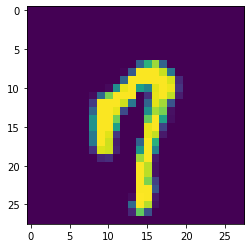

In [11]:
import random
pixels = testX[random.randint(0,len(testX)-1)]
pixels = np.expand_dims(pixels, axis=0)
pyplot.imshow(pixels.reshape(28,28))
prediction = model.predict(pixels)
index = np.argmax(prediction[0])
print("predicted value is "+str(index))